In [1]:
import numpy as np 

In [13]:
psi = np.load("D:\\zjPhD\\Programzj\\psitouTest\\data\\data\\ux_0.npy")

In [14]:
psi.shape

(1, 1, 512, 512)

In [7]:
import matplotlib.pyplot as plt

In [8]:
psi1=psi[0,0,:,:]

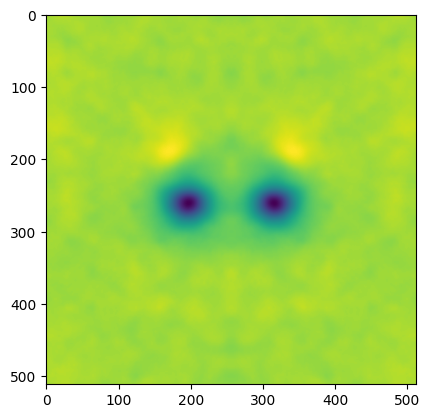

In [9]:
plt.imshow(psi1)

In [6]:
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split

# 设置文件路径
source_dir = r"D:\zjPhD\Programzj\psitouTest\data\data"
output_dir = r"D:\zjPhD\Programzj\psitouTest\GLT_Noise_Net\data"
model_a_dir = os.path.join(output_dir, "modelA")
model_b_dir = os.path.join(output_dir, "modelB")

# 确保输出目录存在
os.makedirs(model_a_dir, exist_ok=True)
os.makedirs(model_b_dir, exist_ok=True)

for folder in ["train", "test", "val"]:
    for model_dir in [model_a_dir, model_b_dir]:
        os.makedirs(os.path.join(model_dir, folder, "input"), exist_ok=True)
        os.makedirs(os.path.join(model_dir, folder, "target"), exist_ok=True)

# 添加噪声函数
def add_gaussian_noise(data, mean=0, std=0.1):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

# 加载无噪声数据
ux_files = [os.path.join(source_dir, f"ux_{i}.npy") for i in range(101)]
uy_files = [os.path.join(source_dir, f"uy_{i}.npy") for i in range(101)]
psi1_real_files = [os.path.join(source_dir, f"psi1_real_{i}.npy") for i in range(101)]
psi1_imag_files = [os.path.join(source_dir, f"psi1_imag_{i}.npy") for i in range(101)]

# 将数据划分为训练、验证和测试集
indices = list(range(101))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)
train_idx, val_idx = train_test_split(train_idx, test_size=0.25, random_state=42)

# 数据处理与保存
def process_and_save_data(model, indices, data_type="train"):
    for i in indices:
        # 加载速度场和波函数数据
        ux = np.load(ux_files[i])
        uy = np.load(uy_files[i])
        psi_real = np.load(psi1_real_files[i])
        psi_imag = np.load(psi1_imag_files[i])

        # 构建目标数据：无噪声波函数（模型A和模型B的target都一样）
        target = np.stack([psi_real, psi_imag], axis=1)  # shape: (1, 2, 512, 512)

        if model == "modelA":
            # 为模型A添加噪声的速度场
            ux_noisy = add_gaussian_noise(ux)
            uy_noisy = add_gaussian_noise(uy)
            input_data = np.stack([ux_noisy, uy_noisy], axis=1)  # shape: (1, 2, 512, 512)
        else:
            # 为模型B：模型A的输出作为输入
            input_data = target  # 假设模型A的输出接近于目标

        # 保存数据
        model_dir = model_a_dir if model == "modelA" else model_b_dir
        np.save(os.path.join(model_dir, data_type, "input", f"{i:03d}.npy"), input_data)
        np.save(os.path.join(model_dir, data_type, "target", f"{i:03d}.npy"), target)

# 处理并保存模型A和模型B的数据
process_and_save_data("modelA", train_idx, "train")
process_and_save_data("modelA", val_idx, "val")
process_and_save_data("modelA", test_idx, "test")

process_and_save_data("modelB", train_idx, "train")
process_and_save_data("modelB", val_idx, "val")
process_and_save_data("modelB", test_idx, "test")


In [15]:
ux_0 = np.load("D:\\zjPhD\\Programzj\\psitouTest\\GLT_Noise_Net\\data\\modelA\\train\\input\\003.npy")

ux_0.shape

(1, 2, 1, 512, 512)

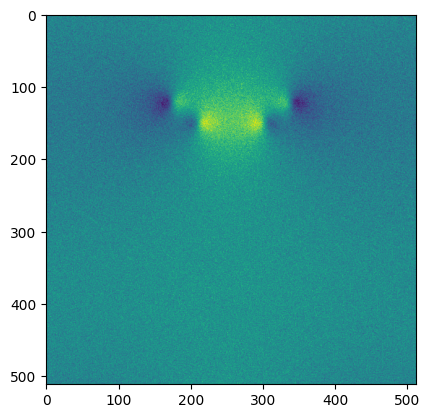

In [17]:
import matplotlib.pyplot as plt
plt.imshow(ux_0[0,0,0,:,:])

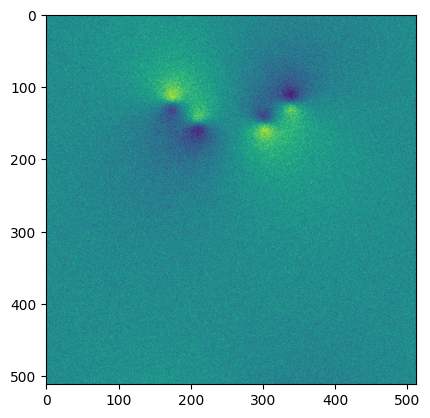

In [18]:
plt.imshow(ux_0[0,1,0,:,:])

In [19]:
import numpy as np
import os
from sklearn.model_selection import train_test_split

# 设置文件路径
source_dir = r"D:\zjPhD\Programzj\psitouTest\data\data"
output_dir = r"D:\zjPhD\Programzj\psitouTest\GLT_Noise_Net\data"
model_a_dir = os.path.join(output_dir, "modelA")
model_b_dir = os.path.join(output_dir, "modelB")

# 确保输出目录存在
os.makedirs(model_a_dir, exist_ok=True)
os.makedirs(model_b_dir, exist_ok=True)

for folder in ["train", "test", "val"]:
    for model_dir in [model_a_dir, model_b_dir]:
        os.makedirs(os.path.join(model_dir, folder, "input"), exist_ok=True)
        os.makedirs(os.path.join(model_dir, folder, "target"), exist_ok=True)

# 添加噪声函数
def add_gaussian_noise(data, mean=0, std=0.1):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

# 加载无噪声数据
ux_files = [os.path.join(source_dir, f"ux_{i}.npy") for i in range(101)]
uy_files = [os.path.join(source_dir, f"uy_{i}.npy") for i in range(101)]
psi1_real_files = [os.path.join(source_dir, f"psi1_real_{i}.npy") for i in range(101)]
psi1_imag_files = [os.path.join(source_dir, f"psi1_imag_{i}.npy") for i in range(101)]
psi2_real_files = [os.path.join(source_dir, f"psi2_real_{i}.npy") for i in range(101)]
psi2_imag_files = [os.path.join(source_dir, f"psi2_imag_{i}.npy") for i in range(101)]

# 将数据划分为训练、验证和测试集
indices = list(range(101))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)
train_idx, val_idx = train_test_split(train_idx, test_size=0.25, random_state=42)

# 数据处理与保存
def process_and_save_data(model, indices, data_type="train", noise_std=0.1):
    for i in indices:
        # 加载速度场和波函数数据
        ux = np.load(ux_files[i])
        uy = np.load(uy_files[i])
        psi1_real = np.load(psi1_real_files[i])
        psi1_imag = np.load(psi1_imag_files[i])
        psi2_real = np.load(psi2_real_files[i])
        psi2_imag = np.load(psi2_imag_files[i])

        # 构建目标数据：无噪声波函数
        target = np.concatenate([psi1_real, psi1_imag, psi2_real, psi2_imag], axis=1)  # shape: (1, 4, 512, 512)

        if model == "modelA":
            # 为模型A添加噪声的速度场，并记录噪声等级
            ux_noisy = add_gaussian_noise(ux, std=noise_std)
            uy_noisy = add_gaussian_noise(uy, std=noise_std)

            # 保存带噪声的速度场数据到modelA的input
            np.save(os.path.join(model_a_dir, data_type, "input", f"ux_noisy_std{noise_std}_{i:03d}.npy"), ux_noisy)
            np.save(os.path.join(model_a_dir, data_type, "input", f"uy_noisy_std{noise_std}_{i:03d}.npy"), uy_noisy)

            # 保存无噪声的目标数据到modelA的target
            np.save(os.path.join(model_a_dir, data_type, "target", f"psi_target_{i:03d}.npy"), target)

        else:
            # 为模型B，假设模型A的输出接近于目标
            input_data = target

            # 保存模型B的输入数据到modelB的input
            np.save(os.path.join(model_b_dir, data_type, "input", f"psi_noisy_output_{i:03d}.npy"), input_data)

            # 保存无噪声的目标数据到modelB的target
            np.save(os.path.join(model_b_dir, data_type, "target", f"psi_target_{i:03d}.npy"), target)

# 处理并保存模型A和模型B的数据
process_and_save_data("modelA", train_idx, "train", noise_std=0.1)
process_and_save_data("modelA", val_idx, "val", noise_std=0.1)
process_and_save_data("modelA", test_idx, "test", noise_std=0.1)

process_and_save_data("modelB", train_idx, "train")
process_and_save_data("modelB", val_idx, "val")
process_and_save_data("modelB", test_idx, "test")


In [22]:
ux_0 = np.load("D:\\zjPhD\\Programzj\\psitouTest\\GLT_Noise_Net\\data\\modelA\\train\\target\\psi_target_001.npy")

ux_0.shape

(1, 4, 512, 512)

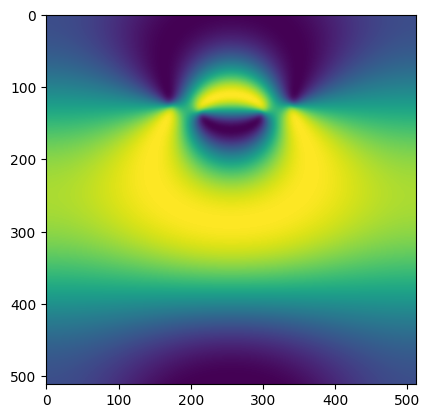

In [24]:
import matplotlib.pyplot as plt
plt.imshow(ux_0[0,1,:,:])

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# 1. 数据集定义
# ------------------------------

In [3]:
class FluidDataset(Dataset):
    def __init__(self, input_dir, target_dir):
        # 获取 ux 和 uy 文件，假设编号是一一对应的
        self.ux_files = sorted([f for f in os.listdir(input_dir) if f.startswith("ux")])
        self.uy_files = sorted([f for f in os.listdir(input_dir) if f.startswith("uy")])
        self.target_files = sorted(os.listdir(target_dir))

        # 检查 ux, uy 和 target 文件数量是否匹配
        if not (len(self.ux_files) == len(self.uy_files) == len(self.target_files)):
            raise ValueError("Input files and target files do not match in expected quantity.")

        self.input_dir = input_dir
        self.target_dir = target_dir

    def __len__(self):
        return len(self.target_files)

    def __getitem__(self, idx):
        # 加载 ux 和 uy 数据
        ux = np.load(os.path.join(self.input_dir, self.ux_files[idx])).squeeze(0)
        uy = np.load(os.path.join(self.input_dir, self.uy_files[idx])).squeeze(0)
        input_data = np.concatenate((ux, uy), axis=0)  # shape: (2, 512, 512)

        # 加载目标波函数，确保形状为 (4, 512, 512)
        target = np.load(os.path.join(self.target_dir, self.target_files[idx])).squeeze(0)

        # 转换为 PyTorch 张量
        input_data = torch.tensor(input_data, dtype=torch.float32)
        target = torch.tensor(target, dtype=torch.float32)

        return input_data, target


# ------------------------------
# 2. 模型定义
# ------------------------------

In [4]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        return self.relu(out)

class ModelA_ResNet(nn.Module):
    def __init__(self):
        super(ModelA_ResNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(2, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            ResidualBlock(64, 64),
            ResidualBlock(64, 128, stride=2),
            ResidualBlock(128, 256, stride=2),
            ResidualBlock(256, 512, stride=2),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            ResidualBlock(256, 256),
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            ResidualBlock(128, 128),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            ResidualBlock(64, 64),
            nn.ConvTranspose2d(64, 4, kernel_size=3, stride=2, padding=1, output_padding=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return F.interpolate(x, size=(512, 512), mode='bilinear', align_corners=False)


# ------------------------------
# 3. 训练和测试
# ------------------------------

In [5]:
# 计算精度的函数
def calculate_accuracy(output, target, threshold=0.1):
    diff = torch.abs(output - target)
    correct = (diff < threshold).float()
    return correct.mean().item()

# 训练函数
def train_model(model, dataloader, criterion, optimizer, num_epochs=100, threshold=0.1):
    model.train()
    writer = SummaryWriter(log_dir='training_logs')
    epoch_losses, epoch_accuracies = [], []
    global_step = 0

    for epoch in range(num_epochs):
        running_loss, running_accuracy = 0.0, 0.0

        for i, (imgs, targets) in enumerate(dataloader):
            imgs, targets = imgs.to(device), targets.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, targets)
            accuracy = calculate_accuracy(outputs, targets, threshold=threshold)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            running_accuracy += accuracy

            if i % 10 == 0:
                writer.add_scalar('Training Loss', loss.item(), global_step)
                writer.add_scalar('Training Accuracy', accuracy, global_step)
            global_step += 1
        
        epoch_loss = running_loss / len(dataloader)
        epoch_accuracy = running_accuracy / len(dataloader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
        epoch_losses.append(epoch_loss)
        epoch_accuracies.append(epoch_accuracy)
        writer.add_scalar('Epoch Loss', epoch_loss, epoch)
        writer.add_scalar('Epoch Accuracy', epoch_accuracy, epoch)

    writer.close()
    np.save('epoch_losses.npy', np.array(epoch_losses))
    np.save('epoch_accuracies.npy', np.array(epoch_accuracies))

# 测试函数
def test_model(model, dataloader, criterion, threshold=0.1):
    model.eval()
    test_loss, test_accuracy = 0.0, 0.0
    with torch.no_grad():
        for imgs, targets in dataloader:
            imgs, targets = imgs.to(device), targets.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, targets)
            accuracy = calculate_accuracy(outputs, targets, threshold=threshold)
            test_loss += loss.item()
            test_accuracy += accuracy

    avg_test_loss = test_loss / len(dataloader)
    avg_test_accuracy = test_accuracy / len(dataloader)
    print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_accuracy:.4f}")
    return avg_test_loss, avg_test_accuracy


# ------------------------------
# 4. 执行训练和测试
# ------------------------------

In [6]:
# 加载训练集
train_input_dir = 'D:/zjPhD/Programzj/psitouTest/GLT_Noise_Net/data/modelA/train/input'
train_target_dir = 'D:/zjPhD/Programzj/psitouTest/GLT_Noise_Net/data/modelA/train/target'
train_dataset = FluidDataset(train_input_dir, train_target_dir)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# 初始化模型、损失函数和优化器
model = ModelA_ResNet().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# 训练模型
train_model(model, train_dataloader, criterion, optimizer, num_epochs=1000, threshold=0.1)

# 保存模型
torch.save(model.state_dict(), 'modelA_trained.pth')


Epoch [1/1000], Loss: 0.3925, Accuracy: 0.1693
Epoch [2/1000], Loss: 0.2729, Accuracy: 0.2329
Epoch [3/1000], Loss: 0.2470, Accuracy: 0.2590
Epoch [4/1000], Loss: 0.2354, Accuracy: 0.2802
Epoch [5/1000], Loss: 0.2269, Accuracy: 0.2974
Epoch [6/1000], Loss: 0.2210, Accuracy: 0.3141
Epoch [7/1000], Loss: 0.2120, Accuracy: 0.3173
Epoch [8/1000], Loss: 0.1998, Accuracy: 0.3137
Epoch [9/1000], Loss: 0.1810, Accuracy: 0.3139
Epoch [10/1000], Loss: 0.1661, Accuracy: 0.3299
Epoch [11/1000], Loss: 0.1445, Accuracy: 0.3383
Epoch [12/1000], Loss: 0.1238, Accuracy: 0.3502
Epoch [13/1000], Loss: 0.1050, Accuracy: 0.3639
Epoch [14/1000], Loss: 0.0933, Accuracy: 0.3802
Epoch [15/1000], Loss: 0.0828, Accuracy: 0.3970
Epoch [16/1000], Loss: 0.0755, Accuracy: 0.4116
Epoch [17/1000], Loss: 0.0701, Accuracy: 0.4253
Epoch [18/1000], Loss: 0.0658, Accuracy: 0.4362
Epoch [19/1000], Loss: 0.0618, Accuracy: 0.4490
Epoch [20/1000], Loss: 0.0585, Accuracy: 0.4597
Epoch [21/1000], Loss: 0.0556, Accuracy: 0.4679
E

In [7]:
# 加载测试集并评估模型
test_input_dir = 'D:/zjPhD/Programzj/psitouTest/GLT_Noise_Net/data/modelA/test/input'
test_target_dir = 'D:/zjPhD/Programzj/psitouTest/GLT_Noise_Net/data/modelA/test/target'
test_dataset = FluidDataset(test_input_dir, test_target_dir)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# 重新加载训练好的模型
model.load_state_dict(torch.load('modelA_trained.pth'))
test_loss, test_accuracy = test_model(model, test_dataloader, criterion, threshold=0.1)

Test Loss: 0.1577, Test Accuracy: 0.5275


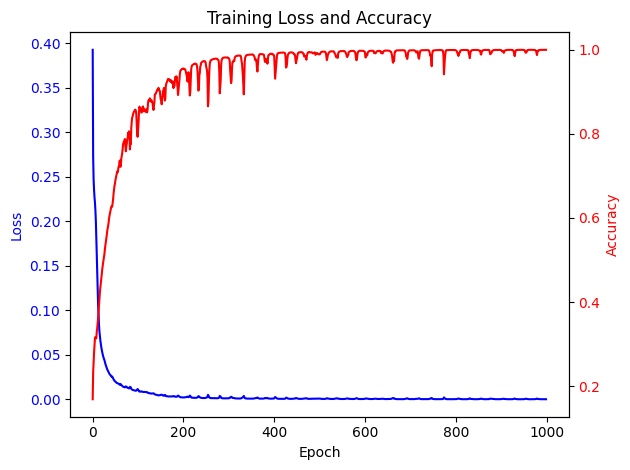

In [8]:
# 加载损失和准确率数据
epoch_losses = np.load('epoch_losses.npy')
epoch_accuracies = np.load('epoch_accuracies.npy')

# 绘制双 y 轴图表
fig, ax1 = plt.subplots()

# 绘制损失曲线
ax1.plot(epoch_losses, 'b-', label='Loss')  # 'b-' 表示蓝色实线
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建第二个 y 轴并绘制准确率曲线
ax2 = ax1.twinx()
ax2.plot(epoch_accuracies, 'r-', label='Accuracy')  # 'r-' 表示红色实线
ax2.set_ylabel('Accuracy', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 添加标题和显示图表
plt.title('Training Loss and Accuracy')
fig.tight_layout()  # 自动调整布局，以防止标签重叠
plt.show()